In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
import joblib 
sns.set(rc={'figure.figsize': [13,13]}, font_scale=1.4)

In [ ]:
df = pd.read_csv("Social_Network_Ads.csv")
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [ ]:
print(df.shape)
print(df.info())

(400, 5)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB
None


In [ ]:
df.drop("User ID",axis=1,inplace=True)

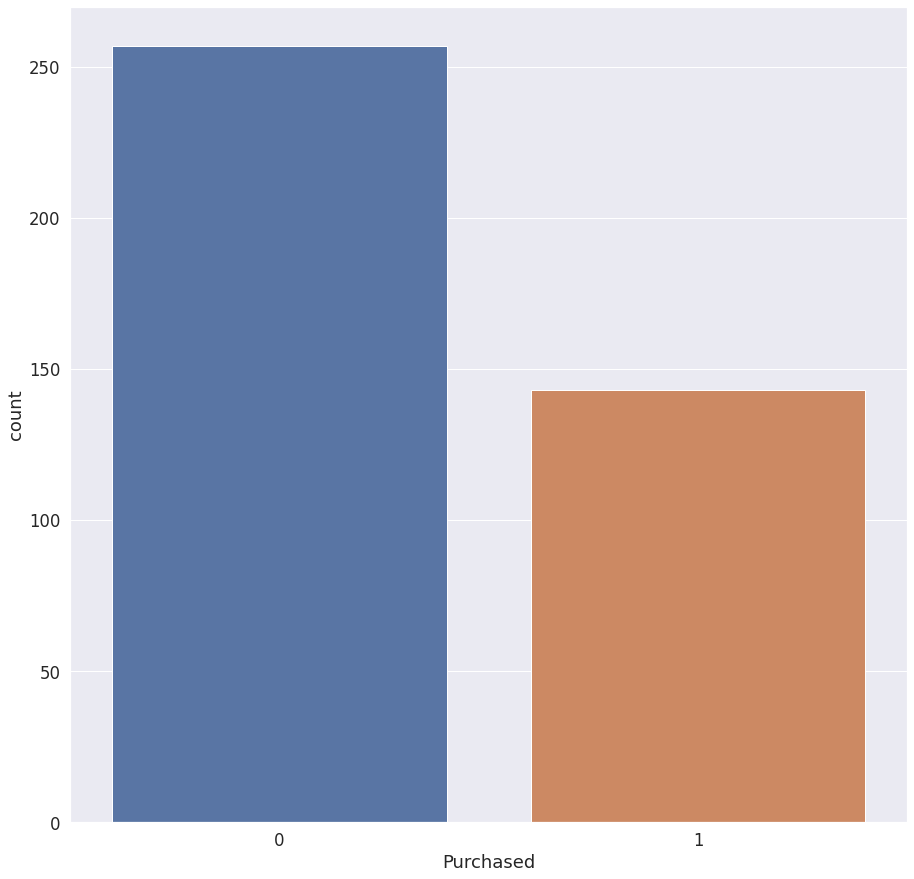

In [ ]:
sns.countplot(data=df,x="Purchased")

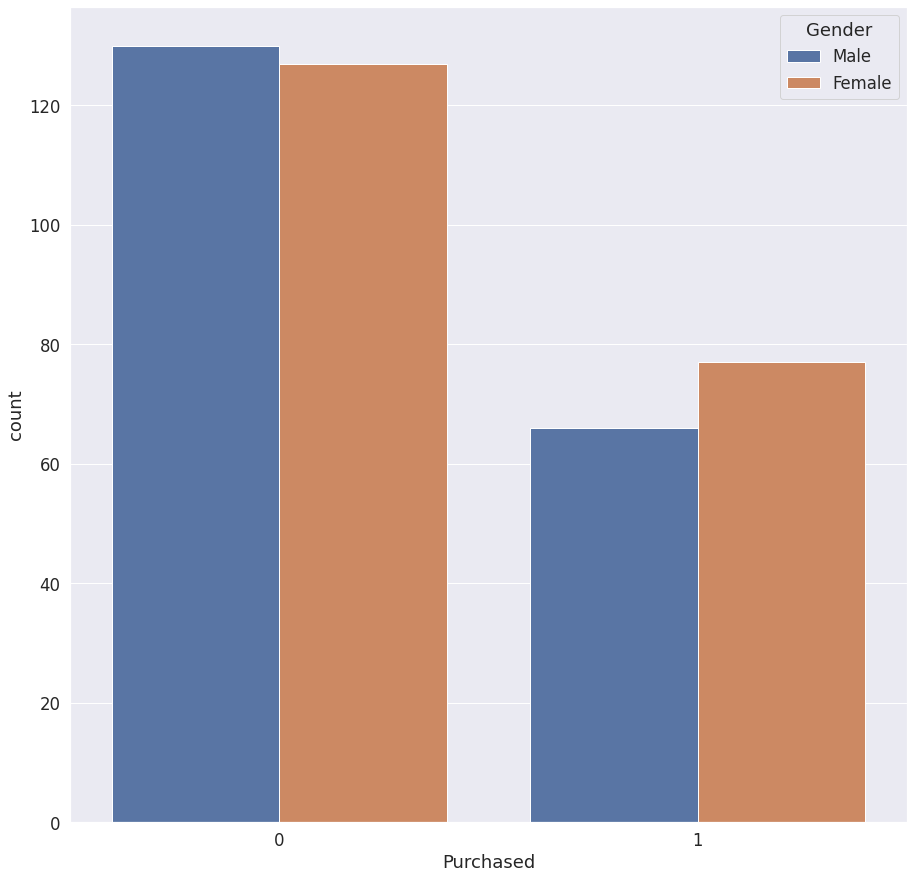

In [ ]:
sns.countplot(data=df,x="Purchased",hue="Gender")

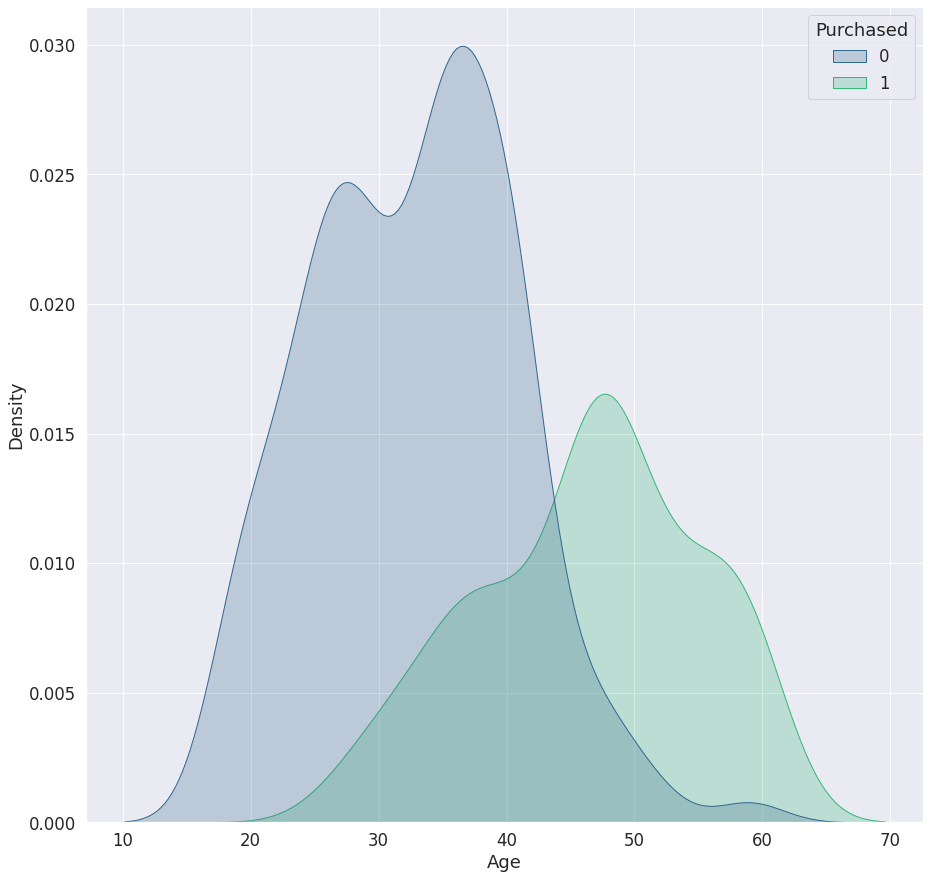

In [ ]:
sns.kdeplot( data=df,x='Age', hue='Purchased', shade=True, color='b', palette='viridis')

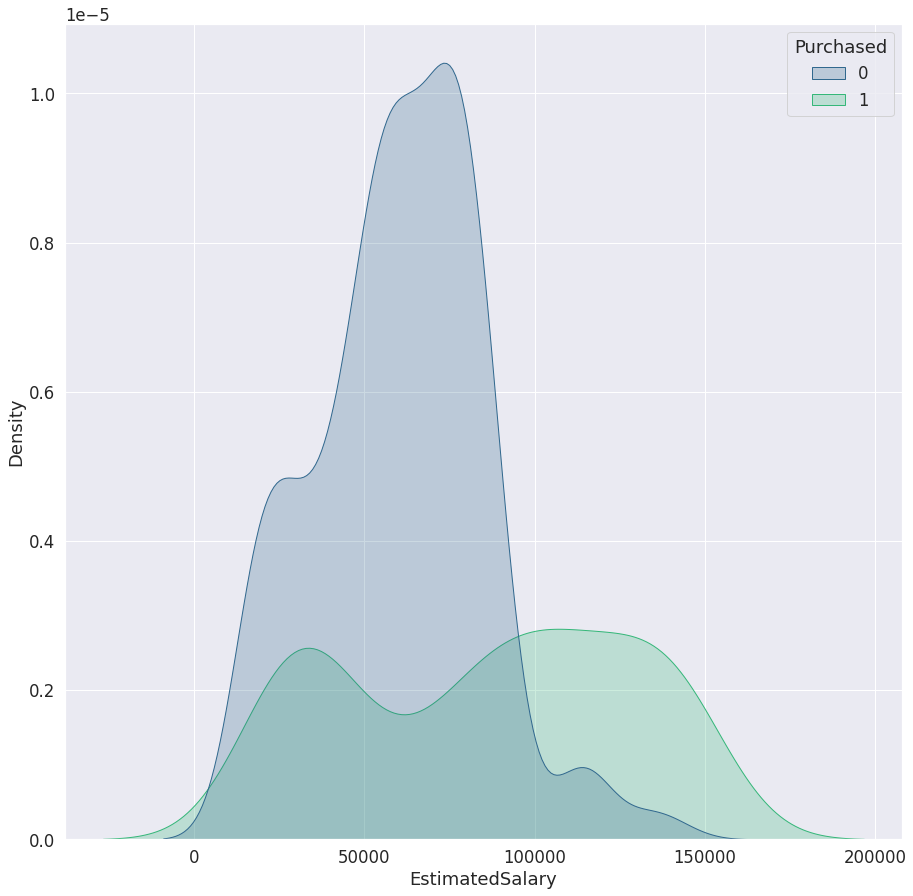

In [ ]:
sns.kdeplot( data=df,x='EstimatedSalary', hue='Purchased', shade=True, color='g', palette='viridis')

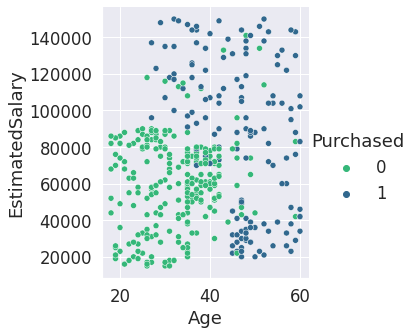

In [ ]:
sns.relplot(data=df,x="Age",y="EstimatedSalary",hue="Purchased", palette='viridis_r')

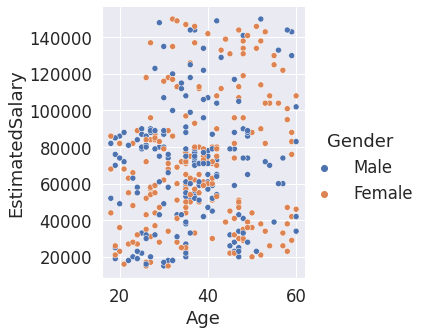

In [ ]:
sns.relplot(data=df,x="Age",y="EstimatedSalary",hue="Gender")

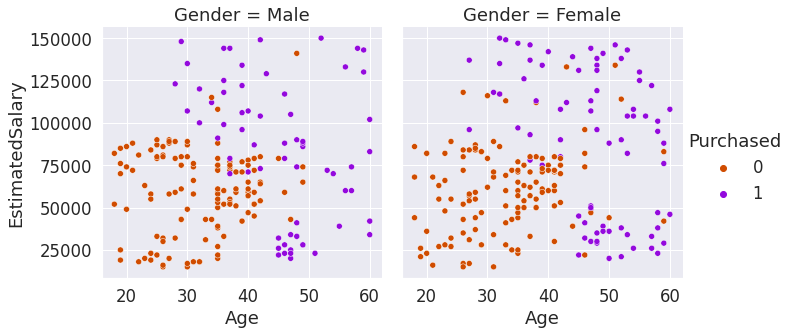

In [ ]:
sns.relplot(data=df,x="Age",y="EstimatedSalary",col="Gender",hue="Purchased", palette='gnuplot_r')

In [ ]:
df=pd.get_dummies(df,columns=['Gender'])
df

,Age,EstimatedSalary,Purchased,Gender_Female,Gender_Male
0,19,19000,0,0,1
1,35,20000,0,0,1
2,26,43000,0,1,0
3,27,57000,0,1,0
4,19,76000,0,0,1
...,...,...,...,...,...
395,46,41000,1,1,0
396,51,23000,1,0,1
397,50,20000,1,1,0
398,36,33000,0,0,1


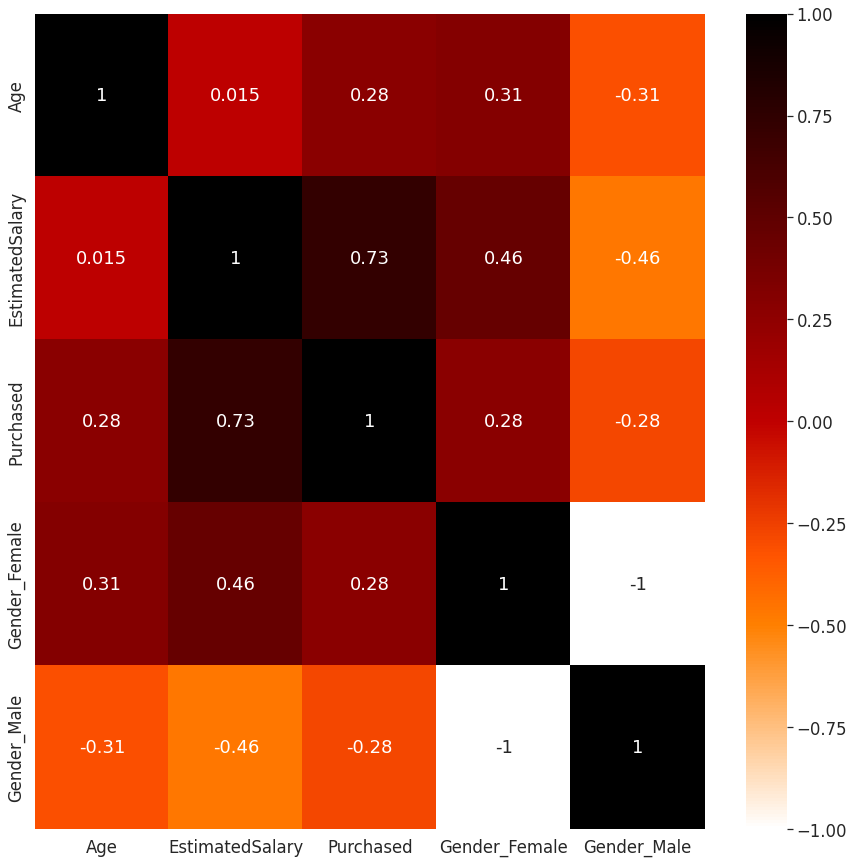

In [ ]:
sns.heatmap(df.iloc[:14].corr() ,annot=True ,cmap="gist_heat_r");

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,400.0,37.6550,10.482877,18.0,29.75,37.0,46.0,60.0
EstimatedSalary,400.0,69742.5000,34096.960282,15000.0,43000.00,70000.0,88000.0,150000.0
Purchased,400.0,0.3575,0.479864,0.0,0.00,0.0,1.0,1.0
Gender_Female,400.0,0.5100,0.500526,0.0,0.00,1.0,1.0,1.0
Gender_Male,400.0,0.4900,0.500526,0.0,0.00,0.0,1.0,1.0


In [ ]:
df.iloc[:,:2]

,Age,EstimatedSalary
0,19,19000
1,35,20000
2,26,43000
3,27,57000
4,19,76000
...,...,...
395,46,41000
396,51,23000
397,50,20000
398,36,33000


In [ ]:
scaler=StandardScaler()
df.iloc[:,:2]=scaler.fit_transform(df.iloc[:,:2])
df

,Age,EstimatedSalary,Purchased,Gender_Female,Gender_Male
0,-1.781797,-1.490046,0,0,1
1,-0.253587,-1.460681,0,0,1
2,-1.113206,-0.785290,0,1,0
3,-1.017692,-0.374182,0,1,0
4,-1.781797,0.183751,0,0,1
...,...,...,...,...,...
395,0.797057,-0.844019,1,1,0
396,1.274623,-1.372587,1,0,1
397,1.179110,-1.460681,1,1,0
398,-0.158074,-1.078938,0,0,1


In [ ]:
x=df.drop("Purchased",axis=1)
y=df["Purchased"]

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [ ]:
print(y_train.value_counts())
print(y.value_counts())

0    182
1     98
Name: Purchased, dtype: int64
0    257
1    143
Name: Purchased, dtype: int64


In [ ]:
sampler=SMOTE()
x_train,y_train=sampler.fit_resample(x_train,y_train)


In [ ]:
y_train.value_counts()

1    182
0    182
Name: Purchased, dtype: int64

In [ ]:
models={
    'LR':LogisticRegression(),
    'KNN':KNeighborsClassifier(),
    'DT':DecisionTreeClassifier(),
    'SVC':SVC(),
    'NB':GaussianNB(),
    'RF':RandomForestClassifier(),
    'XGBC':XGBClassifier()
}

In [ ]:
for name,model in models.items():
    print(f'using{name}')
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    print(f'training ACC: {accuracy_score(y_train,model.predict(x_train))}')
    print(f'testing ACC: {accuracy_score(y_test,y_pred)}')

usingLR
training ACC: 0.8846153846153846
testing ACC: 0.7666666666666667
usingKNN
training ACC: 0.9560439560439561
testing ACC: 0.8833333333333333
usingDT
training ACC: 0.9972527472527473
testing ACC: 0.75
usingSVC
training ACC: 0.9505494505494505
testing ACC: 0.8666666666666667
usingNB
training ACC: 0.8956043956043956
testing ACC: 0.8333333333333334
usingRF
training ACC: 0.9972527472527473
testing ACC: 0.8333333333333334
usingXGBC
training ACC: 0.967032967032967
testing ACC: 0.8666666666666667


In [ ]:
model = SVC()

model.fit(x_train, y_train)

SVC()

In [ ]:
x.columns

Index(['Age', 'EstimatedSalary', 'Gender_Female', 'Gender_Male'], dtype='object')

In [ ]:
joblib.dump(model, 'model.h5')
joblib.dump(scaler, 'scaler.h5')

['scaler.h5']